<a href="https://colab.research.google.com/github/vj012/Medical-Clustering/blob/main/Medical_clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [ ]:
train = pd.read_csv("TRAIN.csv",na_values=['None','?'])
test = pd.read_csv("TEST.csv",na_values=['None','?'])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
train.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted_NO
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,1
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,0
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,1
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,1
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,1


In [ ]:
miss_val=(train.isna().sum()/len(train))*100
miss_val[miss_val>0].sort_values(ascending=False)

weight               96.703914
max_glu_serum        93.076534
A1Cresult            84.027739
payer_code           52.109888
medical_specialty    41.501488
race                  1.920377
diag_3                1.747712
diag_2                0.436577
diag_1                0.025268
dtype: float64

In [ ]:
for col in train.columns:
    if miss_val[col] > 10:
        train=train.drop(columns=col)
        test=test.drop(columns=col)

In [ ]:
train[train['gender']=='Unknown/Invalid']


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted_NO
30506,Other,Unknown/Invalid,[70-80),3,1,1,1,5,5,22,...,No,No,No,No,No,No,No,Ch,Yes,1


In [ ]:
test[test['gender']=='Unknown/Invalid']

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,index
4315,NaN,Unknown/Invalid,[60-70),1,1,7,1,38,1,6,...,No,No,No,No,No,No,No,No,No,4315
11337,NaN,Unknown/Invalid,[70-80),1,22,7,8,59,2,21,...,No,No,No,No,No,No,No,Ch,Yes,11337


In [ ]:
train=train.drop(30506)
train=train.reset_index(drop=True)

In [ ]:
test=test.drop(4315)
test=test.reset_index(drop=True)
test=test.drop(11336)
test=test.reset_index(drop=True)

In [ ]:
train.race=train.race.fillna(train.race.mode())
train.diag_1=train.diag_1.fillna(train.diag_1.mode())
train.diag_2=train.diag_2.fillna(train.diag_2.mode())
train.diag_3=train.diag_3.fillna(train.diag_3.mode())

In [ ]:
test.race=test.race.fillna(train.race.mode())
test.diag_1=test.diag_1.fillna(train.diag_1.mode())
test.diag_2=test.diag_2.fillna(train.diag_2.mode())
test.diag_3=test.diag_3.fillna(train.diag_3.mode())

In [ ]:
train['readmitted_NO'].value_counts()

1    37396
0    33839
Name: readmitted_NO, dtype: int64

In [ ]:
for col in train.columns:
  print(col,train[col].dtype)

race object
gender object
age object
admission_type_id int64
discharge_disposition_id int64
admission_source_id int64
time_in_hospital int64
num_lab_procedures int64
num_procedures int64
num_medications int64
number_outpatient int64
number_emergency int64
number_inpatient int64
diag_1 object
diag_2 object
diag_3 object
number_diagnoses int64
metformin object
repaglinide object
nateglinide object
chlorpropamide object
glimepiride object
acetohexamide object
glipizide object
glyburide object
tolbutamide object
pioglitazone object
rosiglitazone object
acarbose object
miglitol object
troglitazone object
tolazamide object
examide object
citoglipton object
insulin object
glyburide-metformin object
glipizide-metformin object
glimepiride-pioglitazone object
metformin-rosiglitazone object
metformin-pioglitazone object
change object
diabetesMed object
readmitted_NO int64


In [ ]:
l1=train.select_dtypes(exclude = 'int64')
l1.columns

Index(['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')

In [ ]:
temp = {}
for col in train.columns:
  temp[col] = pd.DataFrame({
        'data': train[col].unique(), 
        'data_new':range(len(train[col].unique()))
  })

In [ ]:
temps = {}
for col in l1.columns:
  print(col)
  temps[col] = pd.DataFrame({
        'data': train[col].unique(), 
        'data_new':range(len(train[col].unique()))
  })
  for index, row in temps[col].iterrows():
    train[col] = train[col].replace(row['data'], row['data_new'])
    test[col] = test[col].replace(row['data'], row['data_new'])

race
gender
age
diag_1
diag_2
diag_3
metformin
repaglinide
nateglinide
chlorpropamide
glimepiride
acetohexamide
glipizide
glyburide
tolbutamide
pioglitazone
rosiglitazone
acarbose
miglitol
troglitazone
tolazamide
examide
citoglipton
insulin
glyburide-metformin
glipizide-metformin
glimepiride-pioglitazone
metformin-rosiglitazone
metformin-pioglitazone
change
diabetesMed


In [ ]:
drop=[]
for col in test.columns:
  for index, i in enumerate(test[col]):
     if isinstance(i,str):
       drop.append(index)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30528 entries, 0 to 30527
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      30528 non-null  int64 
 1   gender                    30528 non-null  int64 
 2   age                       30528 non-null  int64 
 3   admission_type_id         30528 non-null  int64 
 4   discharge_disposition_id  30528 non-null  int64 
 5   admission_source_id       30528 non-null  int64 
 6   time_in_hospital          30528 non-null  int64 
 7   num_lab_procedures        30528 non-null  int64 
 8   num_procedures            30528 non-null  int64 
 9   num_medications           30528 non-null  int64 
 10  number_outpatient         30528 non-null  int64 
 11  number_emergency          30528 non-null  int64 
 12  number_inpatient          30528 non-null  int64 
 13  diag_1                    30528 non-null  object
 14  diag_2                

In [ ]:
test=test.drop(drop)
test=test.reset_index(drop=True)

In [ ]:
test[test.eq("V70").any(1)]

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,index


In [ ]:
temps['age'].data

0      [0-10)
1     [10-20)
2     [20-30)
3     [30-40)
4     [40-50)
5     [50-60)
6     [60-70)
7     [70-80)
8     [80-90)
9    [90-100)
Name: data, dtype: object

In [ ]:
X = train.iloc[:,0:42] 
y = train.iloc[:,-1]   

In [ ]:
from sklearn.feature_selection import mutual_info_classif
info=mutual_info_classif(X,y)
info

array([4.33497359e-03, 1.45780194e-03, 3.94423219e-03, 4.72835429e-03,
       1.58870799e-02, 8.96188420e-03, 0.00000000e+00, 2.88063421e-03,
       1.13590726e-03, 6.28706963e-03, 1.05856949e-02, 8.31724046e-03,
       2.68414978e-02, 1.55923994e-02, 1.19826268e-02, 1.07332309e-02,
       1.28260087e-02, 1.18684337e-03, 0.00000000e+00, 1.55807711e-03,
       3.37504400e-03, 0.00000000e+00, 1.62458672e-03, 0.00000000e+00,
       4.95615558e-05, 4.41525688e-03, 0.00000000e+00, 0.00000000e+00,
       8.49019000e-04, 0.00000000e+00, 1.25415469e-03, 2.49415018e-03,
       0.00000000e+00, 0.00000000e+00, 3.16214956e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.44932183e-03, 6.70267019e-03])

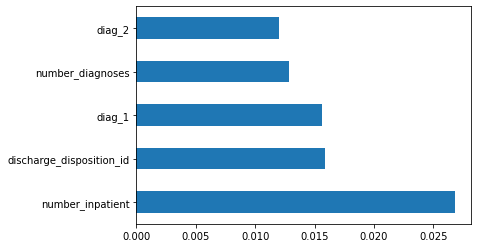

In [ ]:
feat_importances = pd.Series(info, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [ ]:
data=train

In [ ]:
for col in data.columns:
  if col not in feat_importances.nlargest(25):
    data=data.drop(columns=col)

In [ ]:
from sklearn.preprocessing import StandardScaler
data_scale=StandardScaler().fit_transform(data)
data_scale=pd.DataFrame(data_scale,columns=data.columns)


In [ ]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=2)

In [ ]:
model.fit(data_scale)
labels_scale=model.predict(data_scale)
pd.crosstab(labels_scale,train['readmitted_NO'])

readmitted_NO,0,1
row_0,,
0,21458,21919
1,12381,15477


In [ ]:
from sklearn import metrics
metrics.accuracy_score(labels_scale,train['readmitted_NO'])

0.5184951217800239

In [ ]:
test_data=test

In [ ]:
for col in test.columns:
  if col not in feat_importances.nlargest(10):
        test_data=test_data.drop(columns=col)

In [ ]:
test_labels_scale=model.predict(test_data)

In [ ]:
sub=pd.DataFrame(test_labels_scale,columns=['test_label_scale'])

In [ ]:
sub=sub.reset_index()

In [ ]:
sub.to_csv('submission.csv',index=False)